In [1]:
import tarfile
import urllib.request
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
plt.set_cmap("gray") # Otherwise grayscale images look purple
%matplotlib inline

In [2]:
url = 'http://udon.stacken.kth.se/~ninjin/comp0090_assignment_1_data.tar.gz'
ftpstream = urllib.request.urlopen(url)
tar = tarfile.open(fileobj=ftpstream, mode="r|gz")
tar.extractall()
tar.close

<bound method TarFile.close of <tarfile.TarFile object at 0x000002D156940F98>>

In [3]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0))
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0))
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz").transpose((2, 1, 0))
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz")

In [4]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)
print(testxs.shape)
print(testys.shape)

(12000, 28, 28)
(12000,)
(1000, 28, 28)
(1000,)
(1000, 28, 28)
(1000,)


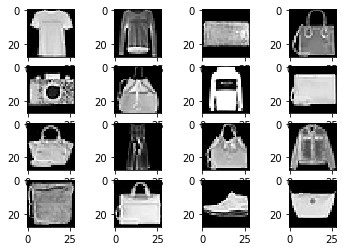

In [5]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(trainxs))])

In [6]:
# reshape data to make it easier to work with
trainxs = trainxs.reshape(-1, 784)
devxs = devxs.reshape(-1, 784)
testxs = testxs.reshape(-1, 784)

In [7]:
# function to create weight and sum parameters for the algorithm
def initialise_parameters(xs):
    w = np.zeros(xs.shape[1])
    b = 0
    return w, b

In [8]:
def logistic_func(x):
    return 1/(1 + np.exp(-x))

def logistic_der(x):
    return logistic_func(x) * (1 - logistic_func(x))

def f(x, w, b):
    return logistic_func(np.dot(w, x) + b)

def p(x, w, b):
    if f(x, w, b) >= 0.5:
        return 1
    return 0

In [9]:
#Measure Accuracy

def accuracy(xs, ys, w, b):
    correct = 0
    for i in range(xs.shape[0]):
        if p(xs[i], w, b) == ys[i]:
            correct += 1
    return correct/len(xs)*100    

In [10]:
#Loss Function

def loss_func(ys, y_predict):
    sum = 0
    n = ys.shape[0]
    for i in range(n):
        sum += (ys[i] - y_predict[i]) ** 2
    return sum / (2*n)

In [11]:
#Loss Function for single points

def loss(y, y_hat):
    return ((y - y_hat) ** 2) / 2

In [12]:
def validation_predictions(devxs, devys, w, b):
    y_predict = []
    
    for i in range(devxs.shape[0]):
        y_hat = f(devxs[i], w, b)
        y_predict.append(y_hat)
        
    return y_predict

In [24]:
def logistic_regression(trainxs, trainys, devxs, devys):
    w, b = initialise_parameters(trainxs)
    
    accuracy_training = []
    accuracy_validation = []
    
    # store predicted y's and loss for each epoch
    y_predict = []
    loss_training = []
    loss_validation = []
    
    mse_train_list = []
    mse_val_list = []
    
    # store old accuracy and consecutive epochs count to detect convergence
    loss_old = loss_func(devys, validation_predictions(devxs, devys, w, b))
    row_epoch = 0
    
    # store number of epochs to have a nice graph
    epoch = 0
    learning_rate = 0.1
    
    while True:
        print('Epoch', epoch)
        trainxs, trainys = shuffle(trainxs, trainys)
        grad_w, grad_b = initialise_parameters(trainxs)
        y_predict = []

        for i in range(trainxs.shape[0]):
            y_hat = f(trainxs[i], w, b)
            y_predict.append(y_hat)
            grad_w += trainxs[i] * (y_hat - trainys[i]) * (1 - y_hat) * y_hat 
            grad_b += (y_hat - trainys[i]) * (1 - y_hat) * y_hat 

        grad_w /= trainxs.shape[0]
        grad_b /= trainxs.shape[0]
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        accuracy_train = accuracy(trainxs, trainys, w, b)
        accuracy_training.append(accuracy_train)
        print('Training set accuracy:', accuracy(trainxs, trainys, w, b))
        accuracy_dev = accuracy(devxs, devys, w, b)
        accuracy_validation.append(accuracy_dev)
        print('Validation set accuracy:', accuracy_dev)
        
        loss_train = loss_func(trainys, y_predict)
        loss_training.append(loss_train)
        print('Training set loss:', loss_train)
        loss_dev = loss_func(devys, validation_predictions(devxs, devys, w, b))
        loss_validation.append(loss_dev)
        print('Validation set loss:', loss_dev)
        
        mse_training = mean_squared_error(trainys, y_predict)/2
        mse_train_list.append(mse_training)
        mse_validation = mean_squared_error(devys, validation_predictions(devxs, devys, w, b))/2
        mse_val_list.append(mse_validation)
        
        # check if converged
        if np.abs(loss_dev - loss_old) < 0.001:
            row_epoch += 1
            if row_epoch == 5:
                break
        else:
            row_epoch = 0
            
        loss_old = loss_dev
        epoch += 1
    
    return epoch, accuracy_training, accuracy_validation, loss_training, loss_validation, mse_train_list, mse_val_list

In [25]:
epoch, accuracy_training, accuracy_validation, loss_training, loss_validation, mse_train_list, mse_val_list = logistic_regression(trainxs, trainys, devxs, devys)

Epoch 0
Training set accuracy: 55.95833333333333
Validation set accuracy: 56.89999999999999
Training set loss: 0.125
Validation set loss: 0.11715526461237141
Epoch 1
Training set accuracy: 66.4
Validation set accuracy: 68.4
Training set loss: 0.11758031575658484
Validation set loss: 0.11166747791745214
Epoch 2
Training set accuracy: 71.98333333333333
Validation set accuracy: 71.89999999999999
Training set loss: 0.11214173444297776
Validation set loss: 0.10685128822965706
Epoch 3
Training set accuracy: 76.40833333333333
Validation set accuracy: 76.2
Training set loss: 0.10732754581142978
Validation set loss: 0.1025725819794579
Epoch 4
Training set accuracy: 78.34166666666667
Validation set accuracy: 78.8
Training set loss: 0.10306007592268594
Validation set loss: 0.09876912731742027
Epoch 5
Training set accuracy: 79.48333333333333
Validation set accuracy: 80.2
Training set loss: 0.09927988984547219
Validation set loss: 0.09538216917298471
Epoch 6
Training set accuracy: 80.15
Validation 

In [26]:
print("mse training loss: ", mse_train_list)
print("our training loss: ", loss_training)

mse training loss:  [0.125, 0.11758031575658488, 0.11214173444297776, 0.10732754581143035, 0.1030600759226863, 0.09927988984547187, 0.09592490463979349, 0.09293625800817144, 0.09026113728526274, 0.08785367163428162, 0.08567478400541657, 0.08369155407878744, 0.08187640814059816, 0.08020630157100057, 0.07866197101512377, 0.0772272845873897, 0.07588869358033219, 0.074634777703646, 0.07345587160436155, 0.07234375973883138, 0.0712914276258896, 0.07029285908435218, 0.06934287074019445, 0.0684369766498912, 0.06757127724051364, 0.06674236789856439]
our training loss:  [0.125, 0.11758031575658484, 0.11214173444297776, 0.10732754581142978, 0.10306007592268594, 0.09927988984547219, 0.09592490463979385, 0.0929362580081717, 0.0902611372852624, 0.08785367163428177, 0.08567478400541688, 0.08369155407878755, 0.08187640814059809, 0.08020630157100099, 0.07866197101512372, 0.07722728458738973, 0.0758886935803318, 0.0746347777036459, 0.0734558716043613, 0.07234375973883143, 0.07129142762588957, 0.07029285

In [27]:
print("mse val loss: ", mse_val_list)
print("pour val loss: ", loss_validation)

mse val loss:  [0.11715526461237133, 0.11166747791745217, 0.10685128822965703, 0.10257258197945782, 0.0987691273174204, 0.09538216917298459, 0.09235575045133314, 0.0896391655305388, 0.08718804628863794, 0.08496438531543044, 0.08293602219731278, 0.08107592122327409, 0.0793614164475059, 0.07777350848691052, 0.07629624660415586, 0.07491620324667636, 0.07362203569088274, 0.07240412439839543, 0.07125427646638352, 0.0701654831283722, 0.06913172156509377, 0.06814779277680115, 0.0672091886956367, 0.06631198297624831, 0.06545274096736219, 0.06462844524415982]
pour val loss:  [0.11715526461237141, 0.11166747791745214, 0.10685128822965706, 0.1025725819794579, 0.09876912731742027, 0.09538216917298471, 0.0923557504513331, 0.08963916553053887, 0.08718804628863795, 0.08496438531543041, 0.08293602219731289, 0.08107592122327405, 0.07936141644750591, 0.07777350848691052, 0.07629624660415578, 0.07491620324667636, 0.07362203569088266, 0.07240412439839536, 0.07125427646638346, 0.07016548312837216, 0.069131

In [ ]:
plt.axis([-100, epoch, min(loss_validation), max(loss_training)])
plt.plot(loss_training, label='training set loss')
plt.plot(loss_validation, label='validation set loss', color='r')
plt.legend(loc='upper right')

In [ ]:
plt.axis([-100, epoch, min(accuracy_training), max(accuracy_training) + 5])
plt.plot(accuracy_training, label='training set accuracy')
plt.plot(accuracy_validation, label='validation set accuracy', color='r')
plt.legend(loc='lower right')

In [ ]:
ind = accuracy_validation.index(max(accuracy_validation))
print("Best epoch =", ind)
print("Accuracy on training set =", accuracy_training[ind])
print("Accuracy on validation set =", accuracy_validation[ind])

In [ ]:
def flatten(w, b):
    toflatten = (w, [b])
    vec = np.zeros(sum(len(x) for x in toflatten))
    offset = 0
    for parameter in toflatten:
        vec[offset:offset + len(parameter)] = parameter
        offset += len(parameter)
    return vec

In [ ]:
def unflatten(w, b, vec):
    tounflatten = (w, [b])
    offset = 0
    for parameter in tounflatten:
        parameter[:] = vec[offset:offset + len(parameter)]
        offset += len(parameter)
    return tounflatten

In [ ]:
def fdfprime(w, b, x, y):
    epsilon  = 0.000001
    grad_w = np.zeros_like(w)
    grad_b = 0.0
    vecm     = flatten(w, b)
    vecgradm = flatten(grad_w, grad_b)
    
    for i in range(len(vecm)):
        wi           = vecm[i]

        vecm[i]     += epsilon/2       
        w_j, b_j     = unflatten(grad_w, grad_b, vecm)
        r            = loss(y, f(x, w_j, b_j))
        vecm[i]      = wi
        vecm[i]     -= epsilon/2
        w_j, b_j     = unflatten(grad_w, grad_b, vecm)
        l            = loss(y, f(x, w_j, b_j))
        vecgradm[i]  = (r - l)/epsilon

        vecm[i]      = wi

    return unflatten(grad_w, grad_b, vecgradm)


In [ ]:
def fprime(n, x, y, w, b):
    grad_w = np.zeros(n)
    grad_b = 0.0
    
    #Forward pass
    z = np.dot(w, x) + b
    y_hat = logistic_func(z)
    
    #Backward pass
    grad_z = (y_hat - y) * logistic_der(z)
    grad_w += x * (y_hat - y) * (1 - y_hat) * y_hat 
    grad_b += (y_hat - y) * (1 - y_hat) * y_hat
    
    return (grad_w, [grad_b])

In [ ]:
x = trainxs[0]
y = trainys[0]
w = np.random.random(784) / 100
grad_w, grad_b = fprime(trainxs.shape[1], x, y, w, 0.0)
fd_grad_w, fd_grad_b = fdfprime(w, 0.0, x, y)

In [ ]:
fd_b = np.subtract(fd_grad_b,grad_b)
fd_w = np.subtract(fd_grad_w,grad_w)
max_fd = fd_w.max()
print(fd_b)
print(fd_w)
print("Max difference for w:", max_fd)